<a href="https://colab.research.google.com/github/Nickruti/Advanced_Python/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt

# Dataset

In [25]:
df = pd.read_csv('MangoesAndStone.csv')
df.head()

,weight,size,class
0,74,5.30,stone
1,70,4.41,mango
2,68,4.49,mango
3,63,5.39,stone
4,61,4.63,mango


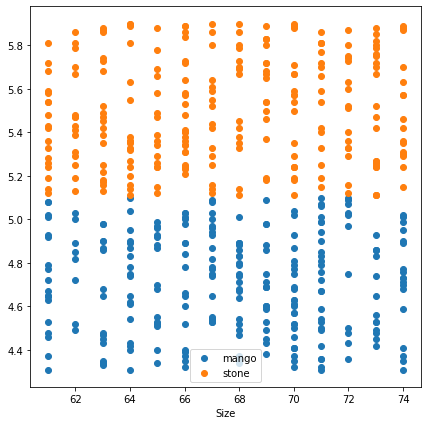

In [29]:
f,ax = plt.subplots(1,1,figsize=(7,7))
for i,cls in df.groupby('class'):    
    ax.scatter(cls['weight'],cls['size'],label='{}'.format(i))
    ax.set_xlabel('Weight')
    ax.set_xlabel('Size')
    ax.legend()

### Train Test Split

In [30]:
# 80:20 split
X = df.drop(['class'],axis=1).values
y = df['class'].astype('category').cat.codes.values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=7)

In [31]:
print('X_train:{}\nX_test:{}\ny_train:{}\ny_test:{}'.format(X_train.shape,X_test.shape,y_train.shape,y_test.shape))

X_train:(400, 2)
X_test:(100, 2)
y_train:(400,)
y_test:(100,)


# 1. Linear Classification

In [32]:
model = SVC(kernel='linear',random_state=17)
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=17, shrinking=True, tol=0.001,
    verbose=False)

In [33]:
pred = model.predict(X_test)
acc = accuracy_score(pred,y_test)
conf_mtx = confusion_matrix(pred,y_test)
print('Confusion Matrix: {}\n'.format(conf_mtx))
print('Accuracy: {}'.format(acc))

Confusion Matrix: [[45  0]
 [ 0 55]]

Accuracy: 1.0


In [38]:
h = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))
print(x_min,x_max,y_min,y_max)
print(xx.shape,yy.shape)

60.0 75.0 3.3099999999999996 6.9
(18, 75) (18, 75)


In [39]:
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

In [49]:
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int8)

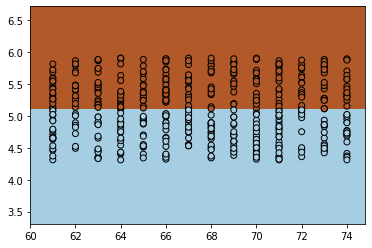

In [40]:
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

In [51]:
y_pred = model.predict([[74, 5.3],
 [70, 4.41]])
y_pred
for i in y_pred:
  if i == 0:
    print("Mango")
  else:
    print("Stone")

Stone
Mango


# 2. Gaussian Kernel Trick

### In-built Function

In [41]:
model = SVC(kernel='rbf',random_state=17)
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=17, shrinking=True, tol=0.001,
    verbose=False)

In [42]:
pred = model.predict(X_test)
acc = accuracy_score(pred,y_test)
conf_mtx = confusion_matrix(pred,y_test)
print('Confusion Matrix: {}\n'.format(conf_mtx))
print('Accuracy: {}'.format(acc))

Confusion Matrix: [[45 55]
 [ 0  0]]

Accuracy: 0.45


In [14]:
h = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))
print(x_min,x_max,y_min,y_max)
print(xx.shape,yy.shape)

60.0 75.0 3.3099999999999996 6.9
(18, 75) (18, 75)


In [15]:
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

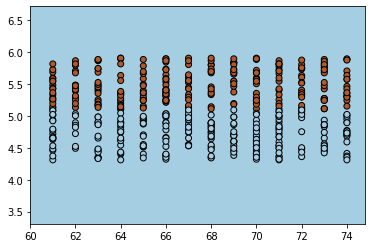

In [16]:
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

### User Function

In [43]:
def gauss_kernel(X,Y):
    '''
    Gaussian Kernel
    k(x,y) = exp(- ||x-y||^2 / 2*sigma^2)
    sigma = 1
    k(x,y) = exp(- ||x-y||^2 / 2)
    '''
    def kernel(x1,x2):
        return np.exp(- np.sum( np.power((x1 - x2),2) ) / float( 2 ) )
    
    gram_matrix = np.zeros((X.shape[0], Y.shape[0]))
    for i, x in enumerate(X):
        for j, y in enumerate(Y):
            #print(x,y,type(x),type(y))
            gram_matrix[i, j] = kernel(x, y)
        
    return gram_matrix

In [44]:
model = SVC(kernel=gauss_kernel,random_state=17)
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel=<function gauss_kernel at 0x7fa5b483a830>, max_iter=-1,
    probability=False, random_state=17, shrinking=True, tol=0.001,
    verbose=False)

In [45]:
pred = model.predict(X_test)
acc = accuracy_score(pred,y_test)
conf_mtx = confusion_matrix(pred,y_test)
print('Confusion Matrix: {}\n'.format(conf_mtx))
print('Accuracy: {}'.format(acc))

Confusion Matrix: [[45  1]
 [ 0 54]]

Accuracy: 0.99


In [46]:
h = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))
print(x_min,x_max,y_min,y_max)
print(xx.shape,yy.shape)

60.0 75.0 3.3099999999999996 6.9
(18, 75) (18, 75)


In [47]:
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

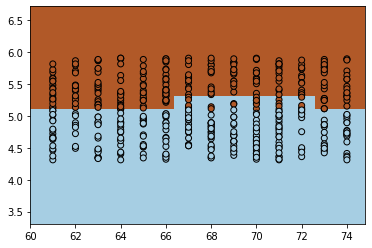

In [48]:
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

In [52]:
y_pred = model.predict([[74, 5.3],
 [70, 4.41]])
y_pred
for i in y_pred:
  if i == 0:
    print("Mango")
  else:
    print("Stone")

Stone
Mango


# 3. Exponential Kernel Trick

In [17]:
def exp_kernel(X,Y):
    '''
    Exponential Kernel
    k(x,y) = exp(- ||x-y|| / 2*sigma^2)
    sigma = 1
    k(x,y) = exp(- ||x-y|| / 2)
    '''
    def kernel(x1,x2):
        return np.exp(- np.sum(x1 - x2) / float( 2 ) )
    
    gram_matrix = np.zeros((X.shape[0], Y.shape[0]))
    for i, x in enumerate(X):
        for j, y in enumerate(Y):
            #print(x,y,type(x),type(y))
            gram_matrix[i, j] = kernel(x, y)
        
    return gram_matrix

In [18]:
model = SVC(kernel=exp_kernel,random_state=17)
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale',
    kernel=<function exp_kernel at 0x7fa5b4b71320>, max_iter=-1,
    probability=False, random_state=17, shrinking=True, tol=0.001,
    verbose=False)

In [19]:
pred = model.predict(X_test)
acc = accuracy_score(pred,y_test)
conf_mtx = confusion_matrix(pred,y_test)
print('Confusion Matrix: {}\n'.format(conf_mtx))
print('Accuracy: {}'.format(acc))

Confusion Matrix: [[ 0  0]
 [45 55]]

Accuracy: 0.55


In [20]:
h = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max,h))
print(x_min,x_max,y_min,y_max)
print(xx.shape,yy.shape)

60.0 75.0 3.3099999999999996 6.9
(18, 75) (18, 75)


In [21]:
Z = model.predict(np.c_[xx.ravel(),yy.ravel()])
Z = Z.reshape(xx.shape)

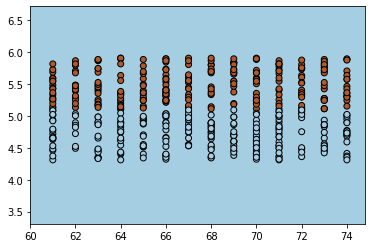

In [22]:
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

In [53]:
y_pred = model.predict([[74, 5.3],
 [70, 4.41]])
y_pred
for i in y_pred:
  if i == 0:
    print("Mango")
  else:
    print("Stone")

Stone
Mango
